# Section 4 - Linear Regression - PyTorch

# PyTorch Instalation

In [1]:
!pip3 install torch torchvision

### Making Predictions (Class 13)

> Making a prediction, in general, is nothing more than submitting an input to a model (unknown function) and getting an output as a result.

In [0]:
import torch

In [0]:
w = torch.tensor(3.0, requires_grad=True)                                       # w -> Scalar Tensor -> Angular Coefficient of the line equation. Receive value 3.0.
b = torch.tensor(1.0, requires_grad=True)                                       # b -> Scalar Tensor -> Linear Coefficient of the line equation. Receive value 1.0.

In [0]:
# Function(model) definition that represents the line equation.

def forward(x):
  y = w*x + b
  return y

In [5]:

x = torch.tensor([[4],[7]])                                                     # Definition of a tensor that is a list of scalars ([4], [7]). This tensor is used as input of the function(model).
forward(x)                                                                      # Input submission(x) in the model(forward function).

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

### Linear Class (Class 14)

In [0]:
import torch
from torch.nn import Linear

In [7]:
torch.manual_seed(1)                                                            # Ensure randomness.
model = Linear(in_features=1, out_features=1)                                   # Instantiating the Linear Regression model signaling that the model will receive one input and return one output. This instance is stored in "model".
print(model.bias, model.weight)                                                 # Displays on screen the angular coefficient (weight) and linear coefficient (bias) of the model. The Linear Regression model can be considered as an equation of line y = wx + b.

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [8]:
x = torch.tensor([[2.0],[3.3]])                                                 # Definition of a tensor that is a list of scalars ([2.0], [3.3]). This tensor is used as an input of the function(model).
print(model(x))                                                                 # Input submission(x) in the model.

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


### Custom Modules (Class 15)

In [0]:
import torch
import torch.nn as nn 

### Linear Regression Class creation
> Inheritance Template: class ***class_name***(***module_name***).
  - The class ***class_name*** is inheriting the constructor, attributes and methods from ***module_name***.

In [0]:
class LR(nn.Module):                                                            # LR class is inheriting the constructor, attributes and methods from nn.Module.
  def __init__(self, input_size, output_size):                                  # The constructor.
    super().__init__()                                                          # Inheriting the constructor from the parent class(nn.Module).
    self.linear = nn.Linear(input_size, output_size)                            # self.linear will store an instance of nn.Linear class.
  
  def forward(self, x):                                                         # This method can be accessed for every instance of the class.
    pred = self.linear(x)                                                       # The variable 'pred' will store the output from the linear model with input x.
    return pred                                                       

In [0]:
torch.manual_seed(1)                                                            # Ensure randomness.
model = LR(1, 1)                                                                # Creating the Linear Regression Model and storing in 'model' variable.

In [12]:
x = torch.tensor([[1.0],[2.0]])                                                 # Creating an input.
print(model.forward(x))                                                         # Submitting the input to the model.

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


### Creating Dataset (Class 16)

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

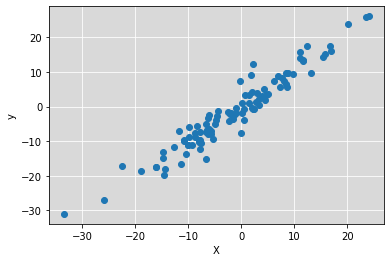

In [14]:
X = torch.randn(100, 1)*10                                                      # Creating the dataset. A sequence of random intergers for X axis.
y = X + 3*torch.randn(100, 1)                                                   # Creating the dataset. Random intergers calculated for Y axis.

# Plotting the dataset.

plt.plot(X.numpy(), y.numpy(), 'o')
plt.grid()
plt.ylabel('y')
plt.xlabel('X')

ax = plt.gca()
ax.set_facecolor((0.85, 0.85, 0.85))
plt.grid(color='w', linestyle='solid')
ax.set_axisbelow(True)


In [0]:
class LR(nn.Module):                                                            # LR class is inheriting the constructor, attributes and methods from nn.Module.
  def __init__(self, input_size, output_size):                                  # The constructor.
    super().__init__()                                                          # Inheriting the constructor from the parent class(nn.Module).
    self.linear = nn.Linear(input_size, output_size)                            # self.linear will store an instance of nn.Linear class.
  
  def forward(self, x):                                                         # This method can be accessed for every instance of the class.
    pred = self.linear(x)                                                       # The variable 'pred' will store the output from the linear model with input x.
    return pred                                                       

In [16]:
torch.manual_seed(1)                                                            # Ensure randomness.
model = LR(1, 1)                                                                # Creating the Linear Regression Model and storing in 'model' variable.
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


> This block of code just get the weight(angular coefficient) and bias(linear coefficient) from the model and return these values using a function named ***get_params()***.

In [17]:
[w, b] = model.parameters()                                            
print(w, b)
w1 = w[0][0].item() 
b1 = b[0].item()
print(w1, b1)

def get_params():
  [w, b] = model.parameters()
  return (w[0][0].item(), b[0].item())

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)
0.5152631998062134 -0.44137823581695557


##### This plot is just to compare the distribution of the dataset instances with the linear function output using the weight and bias got from the model using the ***get_params()*** function. 
 - Blue Dots: Plot of the dataset instances;
 - Red Line: Plot of the line equation y1 = w1*x1 + b1 using the weight and bias got from _get_params()_ function and as input, values from -30 to 30.

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])                                                      # Inputs for Red Line plot.
  y1 = w1*x1 + b1                                                               # Outputs for Red Line plot.
  plt.plot(x1, y1, 'r')                                                         # Red Line: Plot of the line equation y1 = w1*x1 + b1 using the weight and bias got from get_params() function and as input, values from -30 to 30. 
  plt.scatter(X, y)                                                             # Blue Dots: Plot of the dataset instances.
  
  ax = plt.gca()
  ax.set_facecolor((0.85, 0.85, 0.85))
  plt.grid(color='w', linestyle='solid')
  ax.set_axisbelow(True)
  
  plt.show()

##### As can be seen, the red line(model parameters such as weight and bias) is not aligned to best fit the data. The weight and bias must be adjusted during the training step. After the training step, probably the red line will be aligned with the distribution of the dataset instances and the weight and bias values will be different from its initial values.

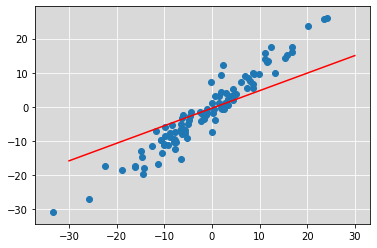

In [19]:
plot_fit('Initial Model')

### Training - Code Implementation (Class 20)



In [0]:
criterion = nn.MSELoss()                                                        # MSE Loss used as cost function.
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)                     # The Stochastic Gradient Descent(SGD) used to update the weight and bias of the model.

In [24]:
epochs = 100                                                                    # Number of epochs(iterations).
losses = []

for i in range(epochs):                                                         # Loop through the epochs.
  y_pred = model.forward(X)                                                     # Submission of the training dataset to the model for every epoch. 
  loss = criterion(y_pred, y)                                                   # Perform the loss function between prediction(y_pred) and labels(y).
  [w, b] = get_params()                                                         # Get the epoch parameters(weight and bias) values of the model.
  print("Epoch:", i, "Loss:", loss.item(), "Weight:", w, "Bias:", b)            # Print epoch, loss, weight and bias values.
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 621154271232.0 Weight: -76424.84375 Bias: 1031.972412109375
Epoch: 1 Loss: 385064009728.0 Weight: -60172.73046875 Bias: 812.5023803710938
Epoch: 2 Loss: 238707687424.0 Weight: -47376.66015625 Bias: 639.703125
Epoch: 3 Loss: 147978928128.0 Weight: -37301.69921875 Bias: 503.6499938964844
Epoch: 4 Loss: 91734646784.0 Weight: -29369.201171875 Bias: 396.5288391113281
Epoch: 5 Loss: 56867868672.0 Weight: -23123.564453125 Bias: 312.187255859375
Epoch: 6 Loss: 35253346304.0 Weight: -18206.072265625 Bias: 245.7810821533203
Epoch: 7 Loss: 21854148608.0 Weight: -14334.2958984375 Bias: 193.496337890625
Epoch: 8 Loss: 13547756544.0 Weight: -11285.8603515625 Bias: 152.33006286621094
Epoch: 9 Loss: 8398483968.0 Weight: -8885.6806640625 Bias: 119.91790771484375
Epoch: 10 Loss: 5206361088.0 Weight: -6995.90283203125 Bias: 94.39828491210938
Epoch: 11 Loss: 3227511808.0 Weight: -5507.9912109375 Bias: 74.30548858642578
Epoch: 12 Loss: 2000789504.0 Weight: -4336.48681640625 Bias: 58.48548507

### Plot of Loss Vs. Epoch

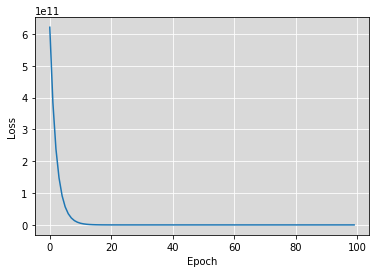

In [25]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

ax = plt.gca()
ax.set_facecolor((0.85, 0.85, 0.85))
plt.grid(color='w', linestyle='solid')
ax.set_axisbelow(True)

##### As can be seen, the red line(model parameters such as weight and bias) is aligned to the data this time. The weight and bias was adjusted during the training step.

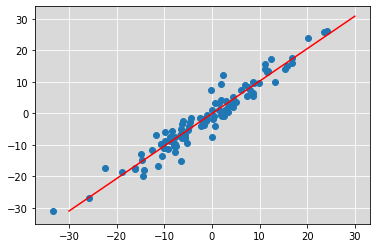

In [26]:
plot_fit('Trained Model')